In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import os

# proxyの設定．

# torchvision.datasetsを利用する場合は，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"      # "0":GPU0, "1":GPU1, "0,1":GPUを2つとも使用

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [4]:
import torchvision
faster_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)


FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [100]:
from PIL import Image
from torchvision import transforms
img = Image.open("elephant.jpg")
img_ori = img
transform = transforms.ToTensor()
img = transform(img)
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 426, 640])

In [101]:
faster_rcnn.eval()
with torch.no_grad():
    out = faster_rcnn(img)

In [102]:
out

[{'boxes': tensor([[  7.3449,  31.1789, 399.2764, 414.1393],
          [ 17.8567, 160.2290, 280.7661, 410.2644],
          [ 88.6737, 243.6749, 250.8907, 408.3237]]),
  'labels': tensor([22, 22, 22]),
  'scores': tensor([0.9998, 0.1545, 0.0567])}]

In [103]:
names = {'0': 'background', '1': 'person', '2': 'bicycle', '3': 'car', '4': 'motorcycle', '5': 'airplane',
         '6': 'bus', '7': 'train', '8': 'truck', '9': 'boat', '10': 'traffic light', '11': 'fire hydrant', 
         '13': 'stop sign', '14': 'parking meter', '15': 'bench', '16': 'bird', '17': 'cat', '18': 'dog', 
         '19': 'horse', '20': 'sheep', '21': 'cow', '22': 'elephant', '23': 'bear', '24': 'zebra', '25': 'giraffe',
         '27': 'backpack', '28': 'umbrella', '31': 'handbag', '32': 'tie', '33': 'suitcase', '34': 'frisbee',
         '35': 'skis', '36': 'snowboard', '37': 'sports ball', '38': 'kite', '39': 'baseball bat', '40': 'baseball glove',
         '41': 'skateboard', '42': 'surfboard', '43': 'tennis racket', '44': 'bottle', '46': 'wine glass', '47': 'cup',
         '48': 'fork', '49': 'knife', '50': 'spoon', '51': 'bowl', '52': 'banana', '53': 'apple', '54': 'sandwich', 
         '55': 'orange', '56': 'broccoli', '57': 'carrot', '58': 'hot dog', '59': 'pizza', '60': 'donut', '61': 'cake',
         '62': 'chair', '63': 'couch', '64': 'potted plant', '65': 'bed', '67': 'dining table', '70': 'toilet', 
         '72': 'tv', '73': 'laptop', '74': 'mouse', '75': 'remote', '76': 'keyboard', '77': 'cell phone', 
         '78': 'microwave', '79': 'oven', '80': 'toaster', '81': 'sink', '82': 'refrigerator', '84': 'book',
         '85': 'clock', '86': 'vase', '87': 'scissors', '88': 'teddybear', '89': 'hair drier', '90': 'toothbrush'}


In [104]:
from PIL import ImageDraw, ImageFont
boxes = out[0]['boxes']
labels = out[0]['labels']
scores = out[0]['scores']
for idx in range(boxes.shape[0]):
        if scores[idx] >= 0.8:
            x1, y1, x2, y2 = boxes[idx][0].item(), boxes[idx][1].item(), boxes[idx][2].item(), boxes[idx][3].item()
            name = names.get(str(labels[idx].item()))
            draw = ImageDraw.Draw(img_ori)
            draw.rectangle((x1, y1, x2, y2),outline=(0, 255, 0),width = 3)
            #PILを使ってテキストを付ける場合に、サイズを調整したいなら、.ttfファイルを引数として送る必要であるみたい
            font = ImageFont.truetype("Arial.ttf", 32)
            draw.text((x1+10, y1+10), name, font=font)


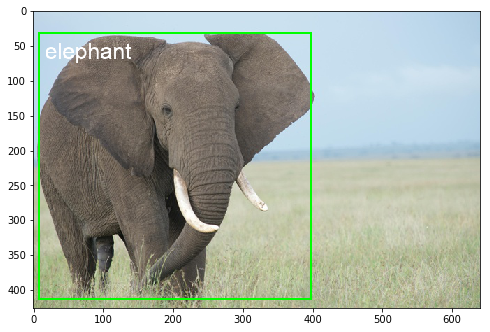

In [105]:
plt.figure(figsize=(8,8))
plt.imshow(img_ori)